In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Import the data
file = "../Resources/Most-Recent-Cohorts-Field-of-Study.csv"
fieldOfStudy = pd.read_csv(file)


In [7]:
# Filter out the cells that have PS as value
def filter_out_value(df, columns, value="PS"):
    for col in columns:
        df = df [df[col] != value]
    return df

In [8]:
# Create dataframes for earnings and gender splits

filtered_df_earnings = filter_out_value(fieldOfStudy, ["EARN_MDN_5YR"])
filtered_df_earnings_male = filter_out_value(fieldOfStudy, ['EARN_MALE_WNE_MDN_5YR']) 
filtered_df_earnings_non_male = filter_out_value(fieldOfStudy, ['EARN_NOMALE_WNE_MDN_5YR']) 
filtered_df_earnings_generic_male_non_male = filter_out_value(fieldOfStudy, ['EARN_NOMALE_WNE_MDN_5YR','EARN_MALE_WNE_MDN_5YR',"EARN_MDN_5YR"])

In [9]:
# Create separate csv files for earnings and gender distribution
filtered_df_earnings.to_csv("filtered_df_earnings.csv")
filtered_df_earnings_male.to_csv("filtered_df_earnings_male.csv")
filtered_df_earnings_non_male.to_csv("filtered_df_earnings_non_male.csv")
filtered_df_earnings_generic_male_non_male.to_csv("filtered_df_earnings_generic_male_non_male.csv")

In [12]:
# Filter out unnecessary columns
columnstokeep = ['INSTNM','CONTROL','CIPDESC','CREDDESC','EARN_MDN_5YR','EARN_MALE_WNE_MDN_5YR','EARN_NOMALE_WNE_MDN_5YR']
filtered_times_2_df_earnings_generic_male_non_male = filtered_df_earnings_generic_male_non_male[columnstokeep]


In [13]:
# Rename columns for easier analysis
filtered_times_2_df_earnings_generic_male_non_male = filtered_times_2_df_earnings_generic_male_non_male.rename(columns={'INSTNM':'College',
                                            'CONTROL':'Funding Status',
                                            'CIPDESC':'Field Of Study',
                                            'CREDDESC':'Degree',
                                            'EARN_MDN_5YR':'5 Year Earnings',
                                            'EARN_MALE_WNE_MDN_5YR':'5 Year Earnings for Males',
                                            'EARN_NOMALE_WNE_MDN_5YR':'5 Year Earnings for Non-Males'})

In [14]:
# Reset the index of the filtered dataframes
filtered_times_2_df_earnings_generic_male_non_male=filtered_times_2_df_earnings_generic_male_non_male.reset_index(drop=True)
filtered_times_2_df_earnings_generic_male_non_male.to_csv('filtered_times_2_df_earnings_generic_male_non_male.csv')

In [15]:
# Remove dashes in institutional names for consistency
def dashfunction (value):
    if ' - ' not in value:
        value = value.split('-')[0]
    return(value)

In [16]:
# Create final gender distribution for earnings dataframe grouped by College
final_df_earnings_generic_male_non_male = filtered_times_2_df_earnings_generic_male_non_male
#final_df_earnings_generic_male_non_male['College'] = final_df_earnings_generic_male_non_male['College'].apply(dashfunction)
#final_df_earnings_generic_male_non_male.groupby('College', as_index=False)

In [17]:
# Cast earnings values as int for calculation
final_df_earnings_generic_male_non_male['5 Year Earnings']=final_df_earnings_generic_male_non_male['5 Year Earnings'].astype(int)
final_df_earnings_generic_male_non_male['5 Year Earnings for Males']=final_df_earnings_generic_male_non_male['5 Year Earnings for Males'].astype(int)
final_df_earnings_generic_male_non_male['5 Year Earnings for Non-Males']=final_df_earnings_generic_male_non_male['5 Year Earnings for Non-Males'].astype(int)

In [20]:
# Group by university and calculate the mean of all earnings columns
mean_earnings_by_university = final_df_earnings_generic_male_non_male.groupby('College', as_index=False).agg({
    '5 Year Earnings': 'mean',
    '5 Year Earnings for Males': 'mean',
    '5 Year Earnings for Non-Males': 'mean'
})

# Convert all earnings columns to integers
mean_earnings_by_university['5 Year Earnings'] = mean_earnings_by_university['5 Year Earnings'].astype(int)
mean_earnings_by_university['5 Year Earnings for Males'] = mean_earnings_by_university['5 Year Earnings for Males'].astype(int)
mean_earnings_by_university['5 Year Earnings for Non-Males'] = mean_earnings_by_university['5 Year Earnings for Non-Males'].astype(int)

# Sort by Mean Earnings in descending order
mean_earnings_by_university = mean_earnings_by_university.sort_values(by='5 Year Earnings', ascending=False)



# Display top 20 for visualization
top_20 = mean_earnings_by_university.head(20)

top_20.head(20)






,College,5 Year Earnings,5 Year Earnings for Males,5 Year Earnings for Non-Males
2864,University of Pikeville,273309,282766,254000
1927,Pacific Northwest University of Health Sciences,257019,264053,247991
1892,Oklahoma State University Center for Health Sc...,242370,242696,240550
2117,Rocky Vista University,232420,232134,236241
1123,Harvey Mudd College,220204,185622,213225
805,Edward Via College of Osteopathic Medicine,214388,240890,203135
2536,Texas Wesleyan University,213854,227160,192428
89,American University of the Caribbean,213090,233178,170326
1687,Mount Marty University,210720,224855,201327
1567,Middle Tennessee School of Anesthesia Inc,209597,233483,182114


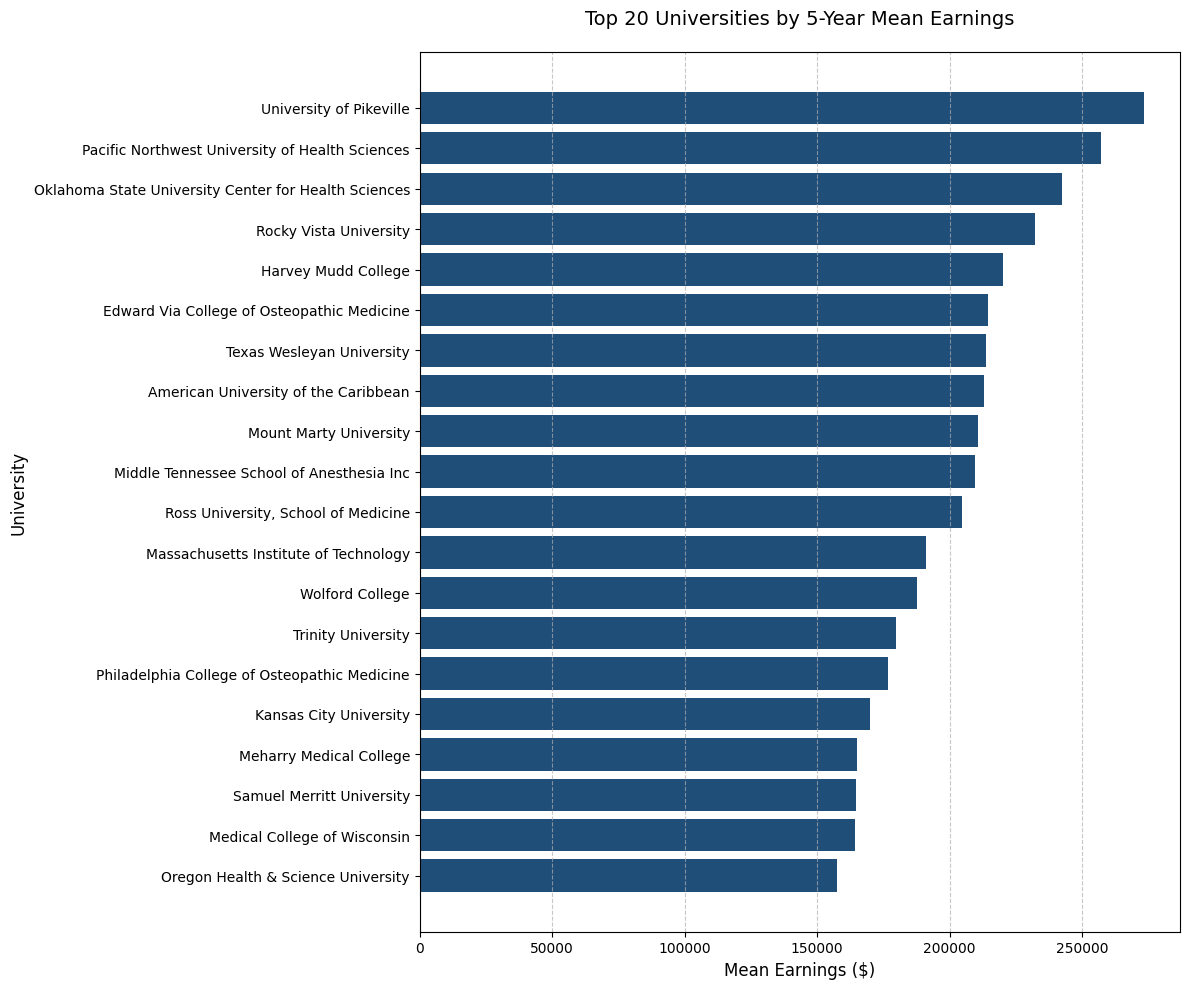

In [23]:
# Create Horizontal chart of 5 Year Mean earnings in Descending Order
top_20 = top_20.sort_values(by='5 Year Earnings', ascending=True) 

# Create figure with larger size
plt.figure(figsize=(12, 10))

# Create horizontal bar chart
plt.barh(top_20['College'], top_20['5 Year Earnings'], color='#1F4E79')

# Add title and labels
plt.title('Top 20 Universities by 5-Year Mean Earnings', pad=20, fontsize=14)
plt.xlabel('Mean Earnings ($)', fontsize=12)
plt.ylabel('University', fontsize=12)

# Add grid lines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


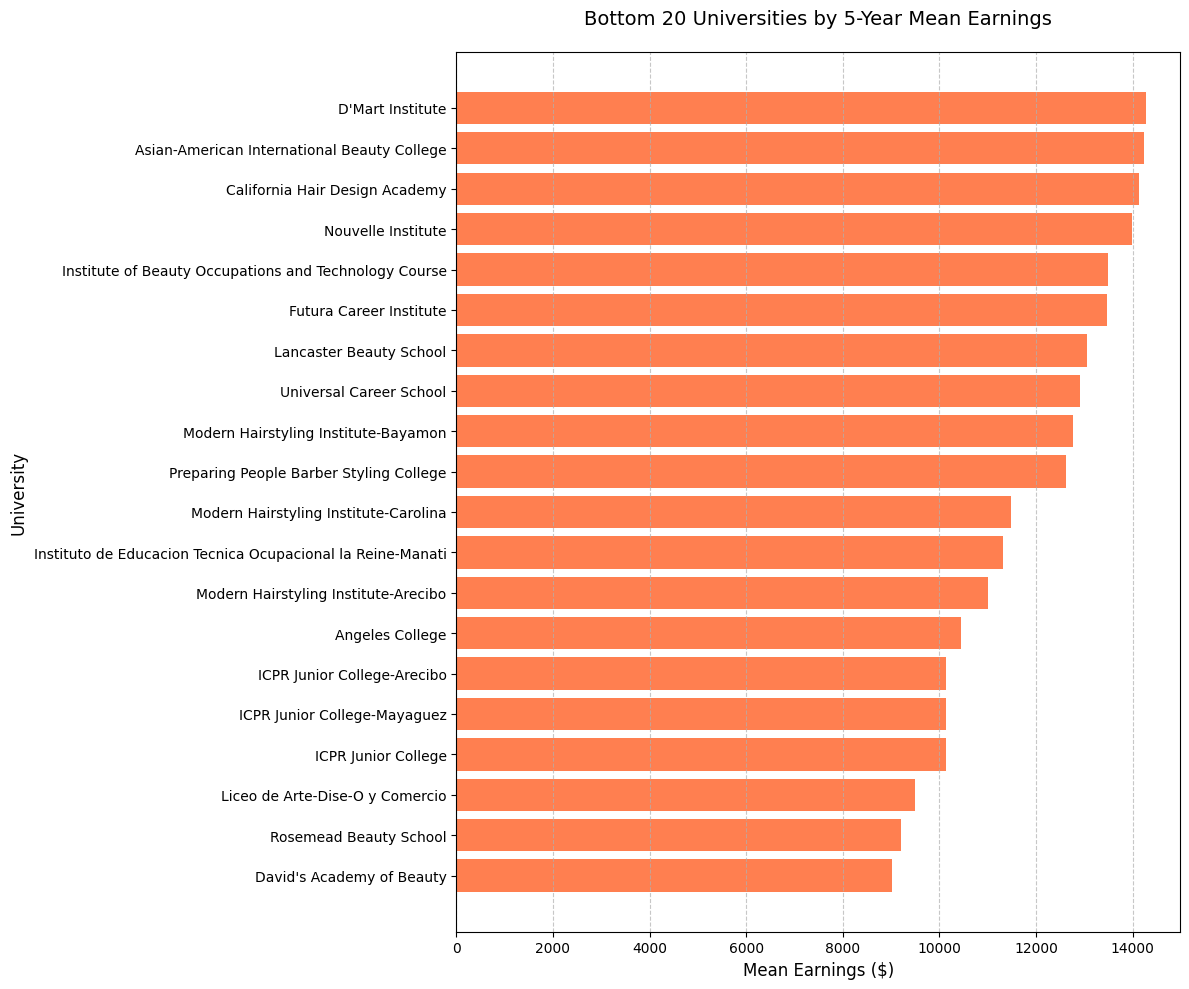

In [26]:
# Sort to visualize bottom 20
bottom_20 = mean_earnings_by_university.sort_values('5 Year Earnings', ascending=True).head(20)

# Create figure with larger size
plt.figure(figsize=(12, 10))

# Create horizontal bar chart - using a different color for bottom performers
plt.barh(bottom_20['College'], bottom_20['5 Year Earnings'], color='#FF7F50')  # Coral color

# Add title and labels
plt.title('Bottom 20 Universities by 5-Year Mean Earnings', pad=20, fontsize=14)
plt.xlabel('Mean Earnings ($)', fontsize=12)
plt.ylabel('University', fontsize=12)

# Add grid lines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

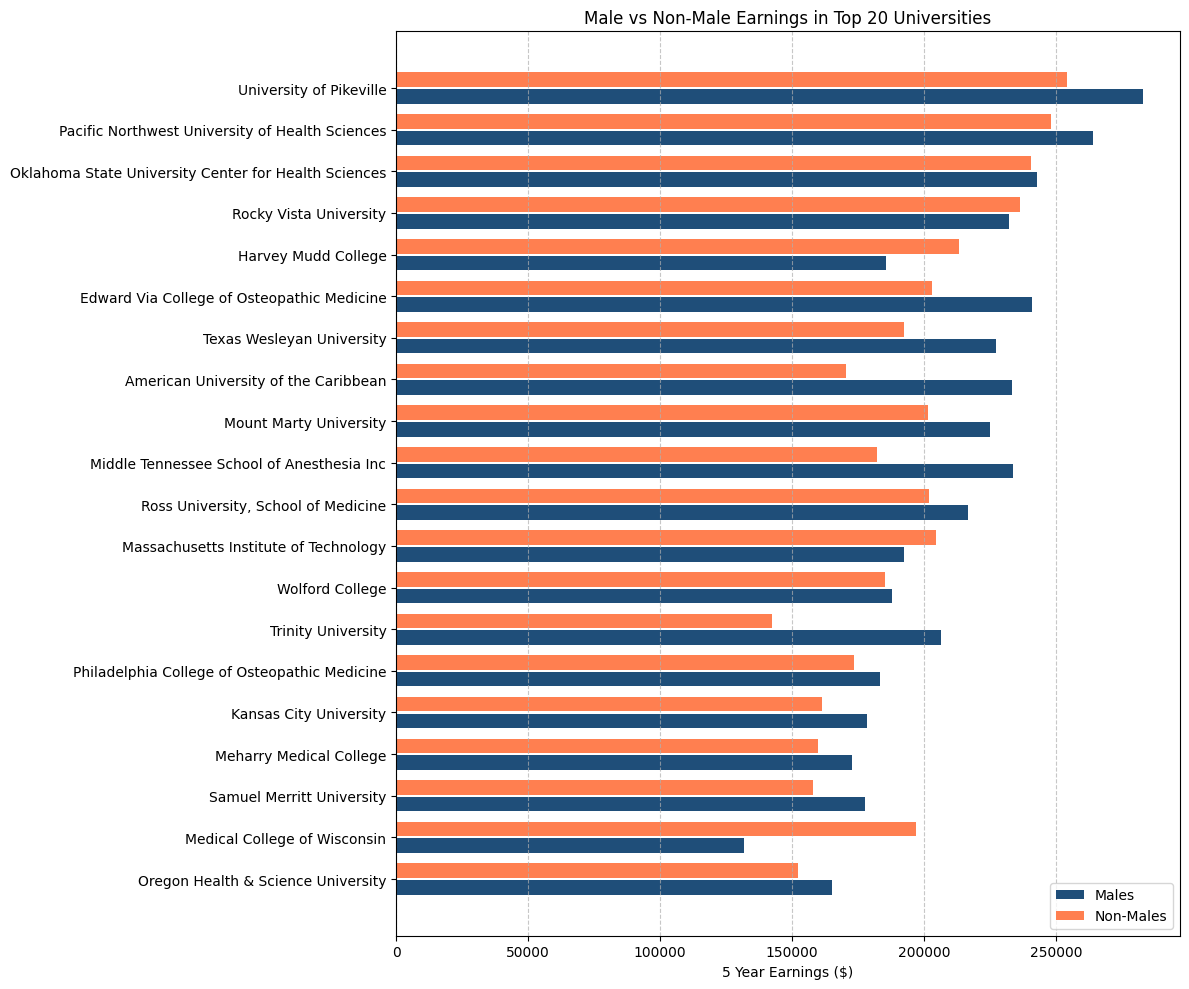

In [27]:
# Group by university and calculate the mean of all earnings columns
mean_earnings_by_university = final_df_earnings_generic_male_non_male.groupby('College', as_index=False).agg({
    '5 Year Earnings': 'mean',
    '5 Year Earnings for Males': 'mean',
    '5 Year Earnings for Non-Males': 'mean'
})

# Convert all earnings columns to integers
mean_earnings_by_university['5 Year Earnings'] = mean_earnings_by_university['5 Year Earnings'].astype(int)
mean_earnings_by_university['5 Year Earnings for Males'] = mean_earnings_by_university['5 Year Earnings for Males'].astype(int)
mean_earnings_by_university['5 Year Earnings for Non-Males'] = mean_earnings_by_university['5 Year Earnings for Non-Males'].astype(int)

# Sort by Mean Earnings in descending order
mean_earnings_by_university = mean_earnings_by_university.sort_values(by='5 Year Earnings', ascending=False)

# Get top 20
top_20 = mean_earnings_by_university.head(20)

# Sort top 20 in descending order for visualization
top_20 = top_20.sort_values(by='5 Year Earnings', ascending=True)  # Sort ascending for horizontal plot to show highest at top

# Create figure
plt.figure(figsize=(12, 10))

# Create horizontal bars
y_pos = range(len(top_20))

# Create bars for both male and non-male earnings
plt.barh(y_pos, top_20['5 Year Earnings for Males'], 
         color='#1F4E79', label='Males', height=0.35)
plt.barh([y + 0.4 for y in y_pos], top_20['5 Year Earnings for Non-Males'], 
         color='#FF7F50', label='Non-Males', height=0.35)

# Customize the plot
plt.yticks([y + 0.2 for y in y_pos], top_20['College'])
plt.xlabel('5 Year Earnings ($)')
plt.title('Male vs Non-Male Earnings in Top 20 Universities')

# Add legend
plt.legend()

# Add grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

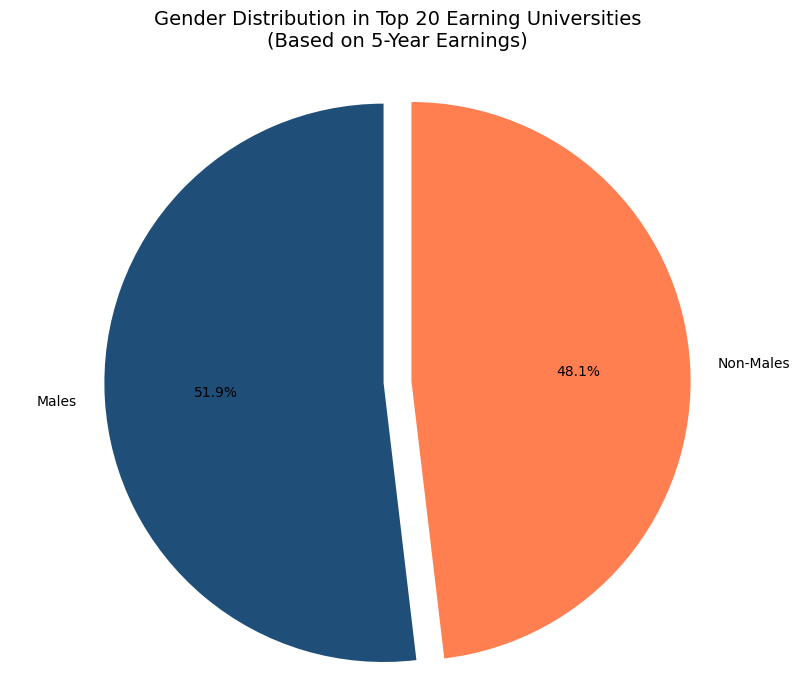

In [29]:
# Calculate totals for male and non-male earnings in top 20
male_earnings = top_20['5 Year Earnings for Males'].sum()
non_male_earnings = top_20['5 Year Earnings for Non-Males'].sum()

# Create pie chart
plt.figure(figsize=(10, 8))

# Data for pie chart
labels = ['Males', 'Non-Males']
sizes = [male_earnings, non_male_earnings]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', 
        colors=['#1F4E79', '#FF7F50'],  # Using same colors as bar chart for consistency
        startangle=90,
        explode=(0.05, 0.05))  # Slight separation between segments

plt.axis('equal')
plt.title('Gender Distribution in Top 20 Earning Universities\n(Based on 5-Year Earnings)', 
         pad=20, fontsize=14)

plt.show()